<center>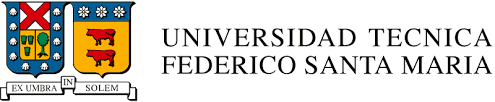</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC


# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

Localizar y subir la api-key de kaggle

In [2]:
#from google.colab import files
#files.upload()

Otorgar permisos de lectura y escritura al archivo kaggle.json

In [3]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

Descargar el dataset

In [4]:
#!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

Descomprimir

In [5]:
#!unzip seoul-bike-sharing-demand-prediction.zip

### 1.1.1 Exploración del conjunto de datos




In [6]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [7]:
# Se muestran algunos datos del conjunto.
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

#### Las variables que poseen valores numericos son:
- Rented Bike Count
- Hour
- Temperature
- Humidity
- Wind speed
- Visibility
- Drew point temperature
- Solar Radiation (MJ/m2)
- Rainfall(mm)
- Snowfall (cm)
- Date

#### Las variables que poseen valores categoricos:
- Seasons
- Holiday
- Functioning Day

Esto se puede visualizar en la celda de arriba.

In [8]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

 El aspecto en comun de estas variables es el tiempo. La variable Season nos entrega informacion de la estacion del año, que puede ser util para analizar la influencia de las condiciones climaticas en diferentes estaciones del año. Por otro lado, tenemos la variable date que puede ser util para tendencias a lo largo del tiempo.

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

Como puede verse en la celda anterior, no hay valores NaN en los datos, por lo que no habrán valores NaN en los conjuntos de prueba y entrenamiento.

### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

In [9]:
data[['Date','Holiday', 'Seasons','Rented Bike Count']].head()
print( "Cantidad de fechas: " + str( len( data['Date'].unique() )  ) )
print( data['Holiday'].unique() )
print( data['Seasons'].unique() )
print( data['Rented Bike Count'].unique() )
#data['Date'].unique() 

Cantidad de fechas: 365
['No Holiday' 'Holiday']
['Winter' 'Spring' 'Summer' 'Autumn']
[ 254  204  173 ... 1538  804  595]


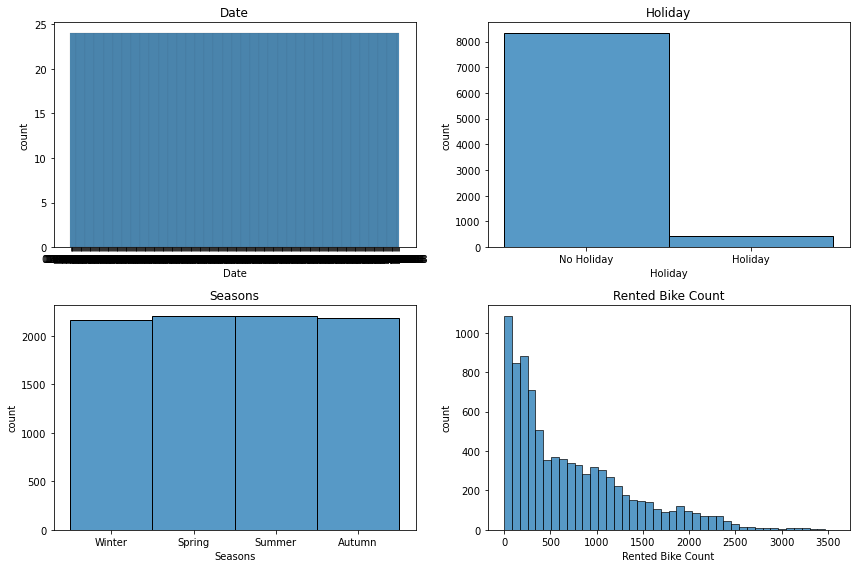

In [10]:
cat_features = ['Date', 'Holiday', 'Seasons', 'Rented Bike Count']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, ax in zip(cat_features, axs.flatten()):
    sns.histplot(data=data, x=i, ax=ax)
    ax.set_title(i)
    ax.set_xlabel(i)
    ax.set_ylabel("count")

plt.tight_layout()
plt.show()

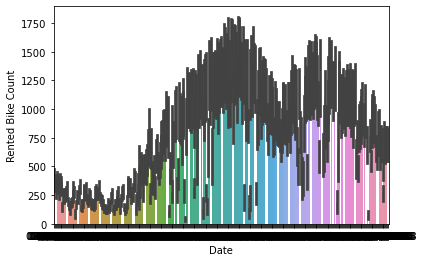

In [11]:
ax = sns.barplot(data=data, x='Date', y='Rented Bike Count')

- **Date:** Se puede observar que cada fecha corresponde al año mes y dia. Ademas en los datos disponemos de 365 dias.
- **Holiday:** La variable date contiene solamente dos valores los cuales son: 'Holiday' y 'No Holiday', es decir, dia festivo y dia no festivo. Se puede observar que existen mas dia festivos y dia no festivos en los datos, que es de esperar, ya que en el año hay mas dias festivo y no festivos.
- **Seasons:** Se observan cuatro valores para Seasons que corresonde a (Winter, Spring, Summer, Autumn) que son: Invierno, Primavera, Verano, Otoño respectivamente. Se observa tambien que la cantidad de estaciones son similares entre si.
- **Rented Bike Count:** Se observa que la cantidad de datos disminuye conforme aumentan el numero de bicicletas rentadas.

Una vez analizado lo anterior responda las siguientes preguntas:

Para las preguntas b), c) y d) apóyese de los gráficos.

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

Bicicletas rentadas en fin de semana:  215895
Bicicletas rentadas en dia semana:   5956419


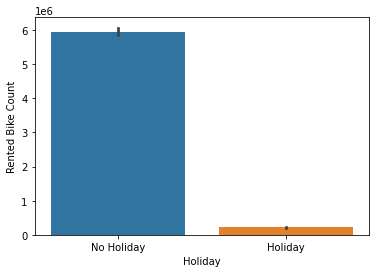

In [12]:
#Se utiliza la suma total para responder la pregunta
#ya que se interpreta la pregunta como el número de bicicletas vendidas
#dentro y fuera de vacaciones.
sns.barplot(x='Holiday',y='Rented Bike Count' , data=data , estimator=sum);

print("Bicicletas rentadas en fin de semana: " , data[ data['Holiday'] == "Holiday" ]['Rented Bike Count'].sum()    )
print("Bicicletas rentadas en dia semana:  " , data[ data['Holiday'] == "No Holiday" ]['Rented Bike Count'].sum() )


Visualizando la cantidad de bicicletas rentadas en dias no festivos y festivos se puede concluir que la gente arrienda mas bicicletas los dias no festivos, es decir, de vacaciones que los dias de semana.

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

Bicicletas rentadas en dia semana:  4506628
Bicicletas rentadas en fin de semana:  1665686


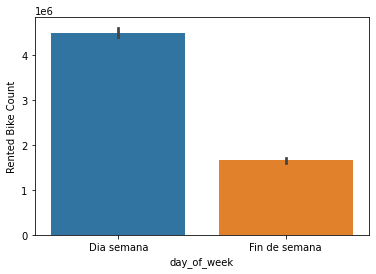

In [13]:
# Retorna true si es fin de semana y false si no
def isWeekend(day):
    if(day > 4):
        return "Fin de semana"
    return "Dia semana"

#Se utiliza la suma total para responder la pregunta
#ya que se interpreta la pregunta como el número de bicicletas vendidas
#dentro y fuera de fines de semana.
is_wekeend = data[ ['Date', 'Rented Bike Count'] ].copy()
is_wekeend['day_of_week'] =  (pd.to_datetime( is_wekeend['Date'], format="%d/%m/%Y" ).dt.dayofweek).apply( lambda x : isWeekend(x) )
sns.barplot(data=is_wekeend, x='day_of_week', y='Rented Bike Count', estimator=sum)

print("Bicicletas rentadas en dia semana: " , is_wekeend[ is_wekeend['day_of_week'] == "Dia semana" ]['Rented Bike Count'].sum()    )
print("Bicicletas rentadas en fin de semana: " , is_wekeend[ is_wekeend['day_of_week'] == "Fin de semana" ]['Rented Bike Count'].sum() )

Realizando el mismo procedimiento anterior, pero ahora para los dia de semana, Lunes a Viernes, y fin de semana, Sabado y Domingo se puede decir que la gente arrienda mas los dia de semanas con una diferencia significativa.

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

[Text(0, 0, '225.541'),
 Text(0, 0, '730.031'),
 Text(0, 0, '1034.07'),
 Text(0, 0, '819.598')]

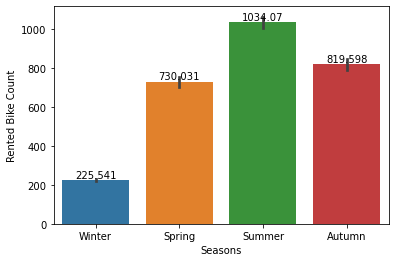

In [14]:
ax = sns.barplot(data=data, x='Seasons', y='Rented Bike Count', estimator='mean')
ax.bar_label(ax.containers[0])

<AxesSubplot:>

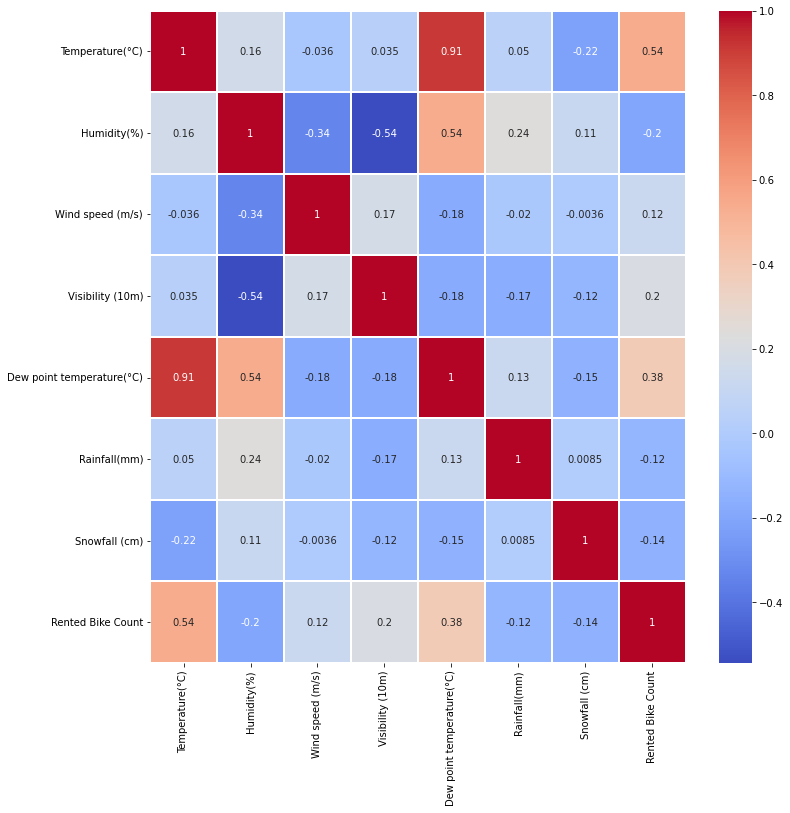

In [15]:
clima = ["Temperature(°C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(°C)",
         "Rainfall(mm)", "Snowfall (cm)","Rented Bike Count"]
data_corr= data[clima].corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

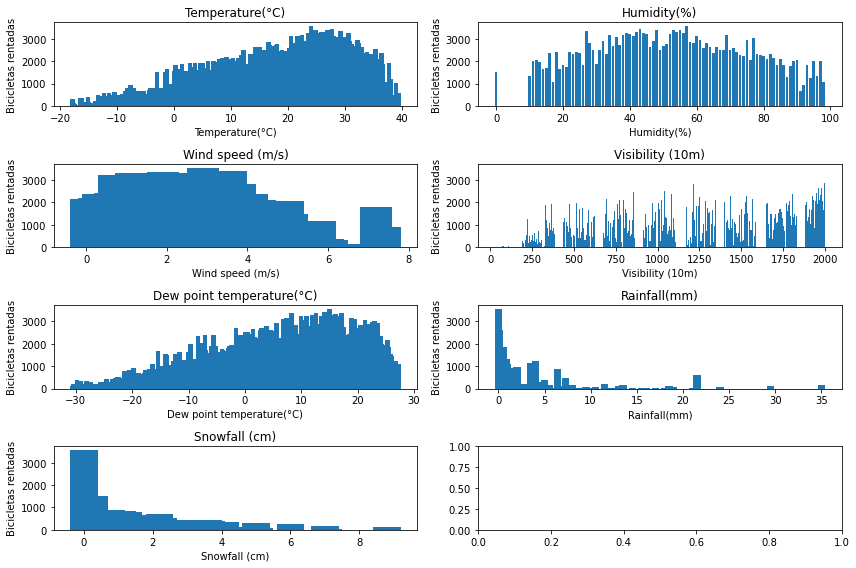

In [16]:
clima = ["Temperature(°C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(°C)",
         "Rainfall(mm)", "Snowfall (cm)"]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
for feature, ax in zip(clima, axs.flatten()):
    ax.bar(x = data[feature], height= data['Rented Bike Count'])
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel("Bicicletas rentadas")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

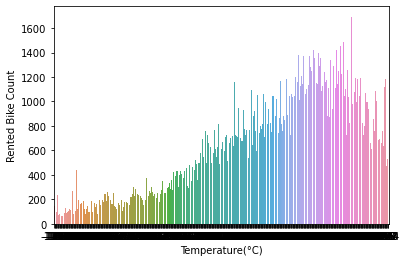

In [17]:
sns.barplot(x = data["Temperature(°C)"],y= data["Rented Bike Count"], errorbar=None)

d) Para esta pregunta se grafico la cantidad promedio de bicicletas rentadas en una estacion predeterminada y la correlacion de 'pearson' entre la cantidad de bicicletas rentadas y las variables correspondientes al clima, como visibilidad, temperatura, rainfall y snowfall. Notamos que a medida se acerca el verano y la temperatura aumenta la cantidad de bicicletas rentadas aumenta. Otro punto importante es que a medida hay mas visibilidad incrementa levemente la venta de bicicletas.

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

Esta respuesta ya esta mas arriba en el grafico que se hizo para d)

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

Las estaciones que mas se arriendan bicicletas, desde mayor a menor segun el grafico del promedio de bicicletas arrendadas por estacion son: Verano, Otoño, Primavera, Invierno.

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [18]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)

In [19]:
data[['year','month','dayofweek']].head()

,year,month,dayofweek
0,2017,12,4
1,2017,12,4
2,2017,12,4
3,2017,12,4
4,2017,12,4


In [20]:
data['dayofweek'].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

g) Para realizar lo anterior se utilizo dt.year, dt.dayofweek y dt.month que proporciona pandas para convertir a variable numerica las fechas.

> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

<AxesSubplot:>

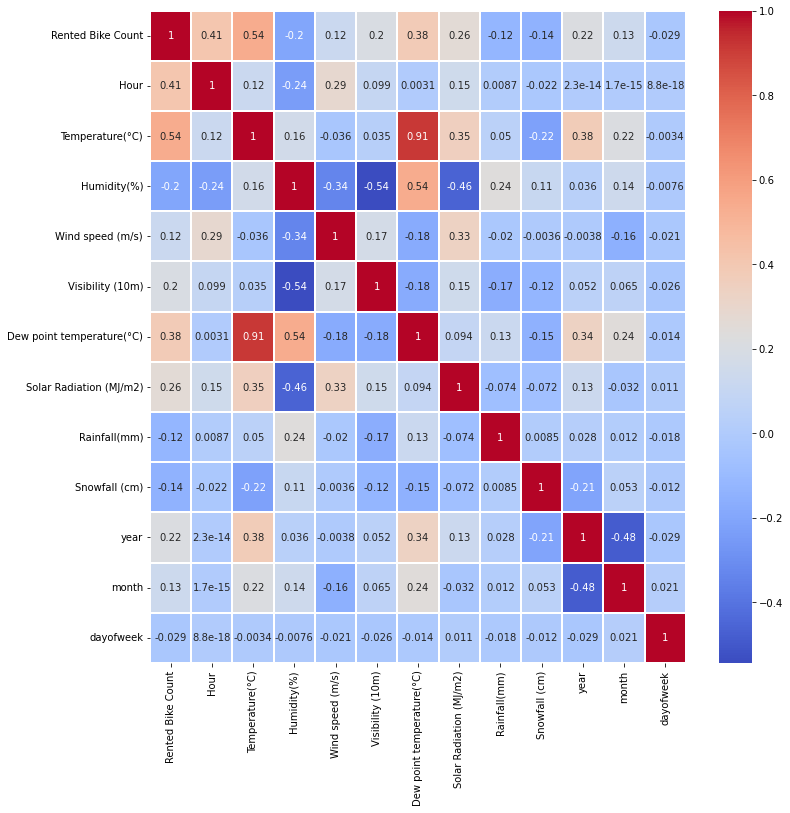

In [21]:
data_corr= data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

Una de las correlaciones importantes que se pueden notar es la del numero de bicicletas rentadas y la temperatura, hay una cierta correlacion positiva entre esas dos variables, lo cual puede ser util para implementar estrategias en torno a la venta de bicicletas para cuando se pronostican altas temperaturas. 

Otra correlacion es la de Visibility y Humidity, con una correlacion negativa. Esta correlacion se puede explicar debido a fenomenos naturales, como la neblina que al fin y al cabo son particulas de agua que estan en el aire (Alta humedad), lo que obstaculizan la vista (Poca visibilidad). Sin embargo, la visibilidad al parecer tiene poco impacto en lo que es el arriendo de bicicletas.

También hay una fuerte correlación positiva entre la temperatura y la temperatura del rocío, hasta el punto en que la variable de temperatura del rocío puede considerarse redundante.

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [22]:
X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

> a) ¿Para qué es el parámetro stratify?

Es para que el conjunto de entrenamiento como el conjunto de prueba tengan una proporción similar de observaciones en cada clase.
>  Por ejemplo, si la variable y es una variable categórica binaria con valores 0 y 1 y hay un 25% de ceros y un 75% de unos, stratify=y se asegurará de que su división aleatoria tenga un 25% de ceros y un 75% de unos.

> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

In [24]:
le = preprocessing.LabelEncoder()
X_train["Seasons"] = le.fit_transform(X_train["Seasons"])
X_train["Holiday"] = le.fit_transform(X_train["Holiday"])
X_train["Functioning Day"] = le.fit_transform(X_train["Functioning Day"])

In [25]:
#Ejemplo de resultado de Label Encoding
X_train["Seasons"].unique()

array([0, 3, 2, 1])

b) Label encoder asigna un numero a cada categoria. Esto sirve para los algoritmos de aprendizaje automático que generalmente requieren que las entradas sean numéricas. Para utilizarlo primero se importa la libreria preprocessing, luego se instancia el objeto LabelEncoder() y luego se utiliza fit_transform(columna) en la varibale que queremos transformar. Es importante tener en cuenta que el Label Encoding solo es adecuado para variables categóricas sin orden específico.

> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [26]:
X_test["Seasons"] = le.fit_transform(X_test["Seasons"])
X_test["Holiday"] = le.fit_transform(X_test["Holiday"])
X_test["Functioning Day"] = le.fit_transform(X_test["Functioning Day"])

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?



Porque label encoder sirve para variables categoricas sin orden y el conjunto de datos contiene distintos tipos de variables. Ademas aplicar label encoder antes del split ocurre lo que se denomina "[data leakage](https://datascience.stackexchange.com/questions/107714/encoding-before-vs-after-train-test-split#:~:text=If%20you%20perform%20the%20encoding,scores%20but%20poor%20in%20deployment)", ya que al aplicar el encoding se pierde la consistencia entre las clases categoricas lo cual puede inducir a un mal desempeño en el modelo.

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [27]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

#Visualización de algunos casos de prueba, junto con el valor de la predicción.
q = X_test.copy()
q["y_pred"] = y_pred
q.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,dayofweek,y_pred
2628,12,9.0,33,3.1,1985,-6.4,2.59,0.0,0.0,1,1,1,2018,3,1,767.183579
3080,8,2.9,53,1.5,1892,-5.7,0.68,0.0,0.0,1,1,1,2018,4,6,410.824641
5813,5,28.3,60,1.6,2000,19.7,0.00,0.0,0.0,2,1,1,2018,7,1,1059.397570
1681,1,-4.8,44,1.1,1432,-15.2,0.00,0.0,0.0,3,1,1,2018,2,4,-80.295578
6547,19,25.1,74,2.1,1105,20.1,0.00,0.5,0.0,2,1,1,2018,8,3,1172.625927


> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [28]:
y_pred = reg.predict(X_test)
first_error = mean_squared_error(y_test, y_pred)
print("Error cuadratico : " + str( first_error ) )

Error cuadratico : 178321.36543638844


> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

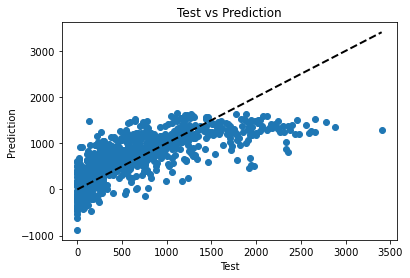

In [29]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2) # Linea de regresion

plt.show()

Se puede observar que la linea de regresion difiere de los datos a medida que crece en el eje X

In [30]:
#Se calcula score R2
print("R2:", r2_score(y_test, y_pred) )

R2: 0.5310756002211792


### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

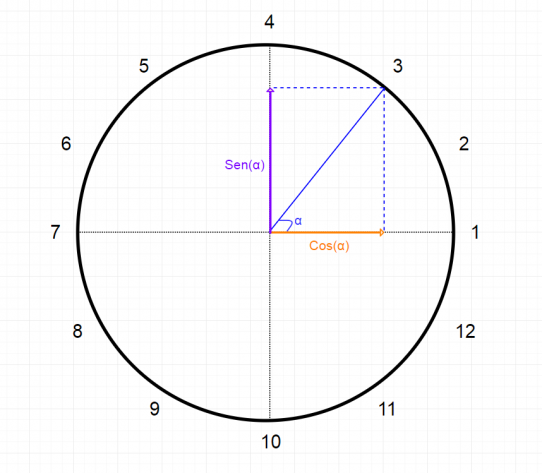


a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

En las funciones de seno y coseno, se tiene un ciclo en el cual todos los valores entre $x = Θ$ y $x= Θ + 2π$
 y 
 son los mismos. utilizar solo el seno y el coseno causa que no se utilice el ciclo y las distancias obtenidas entre cada variable serían incorrectas.

In [31]:
#Periodo hour: 24
#Periodo weekday: 7
#Periodo month: 12
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['weekday_sin'] = np.sin(2 * np.pi * X_train['dayofweek'] / 7)
X_train['weekday_cos'] = np.cos(2 * np.pi * X_train['dayofweek'] / 7)
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)

X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['weekday_sin'] = np.sin(2 * np.pi * X_test['dayofweek'] / 7)
X_test['weekday_cos'] = np.cos(2 * np.pi * X_test['dayofweek'] / 7)
X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)

#Se hace un drop a las columnas sin modificar, ya que no serán usadas
X_train.drop(['dayofweek', 'month', 'Hour'], axis=1, inplace=True)
X_test.drop(['dayofweek', 'month', 'Hour'], axis=1, inplace=True)

Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [32]:
#Periodo Seasons: 4
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [33]:
X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [34]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']
#Normalizamos X_train
X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize]) 

# Normalizamos los valores de y_train y los convertimos a un array bidimensional (truco)
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

# Normalizamos las columnas de X_test utilizando los valores aprendidos en X_train
X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

In [35]:
#y_train transformado
np.array(y_train).reshape(-1, 1)

array([[ 1.36886502],
       [-0.64661706],
       [-0.9460072 ],
       ...,
       [-0.42747582],
       [ 0.5092758 ],
       [ 0.77471448]])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [36]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [37]:
y_pred = reg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)

#Visualización de algunos casos de prueba, junto con el valor de la predicción.
q = X_test.copy()
q["y_pred"] = y_pred
q.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,Sin_Season,Cos_Season,y_pred
2628,-0.323805,-1.241050,1.321502,0.900594,-0.800261,2.315959,-0.132317,-0.169657,1,1,0.30326,1.224647e-16,1.224647e-16,0.781831,0.623490,1.000000,6.123234e-17,1.000000e+00,6.123234e-17,597.464011
3080,-0.833292,-0.255113,-0.221584,0.747596,-0.746713,0.124438,-0.132317,-0.169657,1,1,0.30326,8.660254e-01,8.660254e-01,-0.781831,0.623490,0.866025,-5.000000e-01,1.000000e+00,6.123234e-17,355.780897
5813,1.288178,0.089965,-0.125141,0.925271,1.196288,-0.655790,-0.132317,-0.169657,1,1,0.30326,9.659258e-01,9.659258e-01,0.781831,0.623490,-0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,913.399211
1681,-1.476415,-0.698785,-0.607355,-0.009165,-1.473426,-0.655790,-0.132317,-0.169657,1,1,0.30326,2.588190e-01,2.588190e-01,-0.433884,-0.900969,0.866025,5.000000e-01,-1.000000e+00,-1.836970e-16,265.962496
6547,1.020906,0.780121,0.357074,-0.547124,1.226886,-0.655790,0.294554,-0.169657,1,1,0.30326,-9.659258e-01,-9.659258e-01,0.433884,-0.900969,-0.866025,-5.000000e-01,1.224647e-16,-1.000000e+00,1245.909162


> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [38]:
second_error = mean_squared_error(y_test, y_pred)
print("Error cuadrático: " + str(second_error))

Error cuadrático: 176493.08636853515


> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

In [39]:
print("El error cuadrático para los datos en bruto fue: " + str(first_error))
print("El error cuadrático para los datos normalizados fue: " + str(second_error))

El error cuadrático para los datos en bruto fue: 178321.36543638844
El error cuadrático para los datos normalizados fue: 176493.08636853515


Los resultados presentan una mejora bastante leve.

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

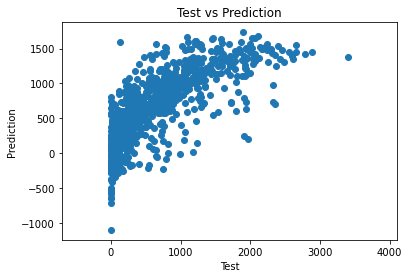

In [40]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

In [41]:
print("R2:", r2_score(y_test, y_pred) )

R2: 0.5358833508932495


### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [42]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:





In [43]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,      
                   max_iter = 100,
                   tol=0.001, 
                   learning_rate = "invscaling",
                   shuffle=True,       
                   n_iter_no_change=10,
                   warm_start=True)

b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

[Fuente](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
- **loss:** Función de pérdida utilizada por el regresor.
- **penalty:** Método de regularización (Ridge, Lasso, Elasticnet)
- **alpha:** Constante que multiplica el método de regularización. También se utiliza para el learning rate optimal
- **l1_ratio:** Constante utilizada en la regularización Elasticnet.
- **fit_intercept:** Un bool que indica si el intercepto también debe ser estimado o si los datos ya están centrados.
- **max_iter:** Número máximo de epochs.
- **tol:** El criterio para el cual se detendrá la regresión con early stopping.
- **shuffle:** Un bool que indica si los datos se mezclarán en cada epoch.
- **verbose:** EL nivel de verbosidad de la información.
- **epsilon:** Constante utilizada para la función de pérdida huber
- **random_state:** Utilizado para la mezcla de datos en caso de que shuffle sea True.
- **learning_rate:** Función de learning rate.
- **eta0:** Constante utilizada para el cálculo de algunas funciones del learning rate.
- **power_t:** Constante utilizada para el cálculo de la función invscaling del learning rate.
- **early_stopping:** Un bool que indica si se detendrá el regresor en caso de que el puntaje de validación entregado no mejore en cierta cantidad determinada luego de un número de epochs.
- **n_iter_no_change:** Número de epochs para el cual se hará el early stopping.
- **warm_start:** Un bool que indica si se utiliza el output anterior para realizar la regularización
- **average:** Calcula promedios de peso de SGD desde cierto punto.

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

El alpha multiplica al método de regularización, controlando la fuerza con la que se realiza la regularización.

Las variaciones del parámetro en el módulo son:

- **constant:** $eta = eta0$
Se utiliza el valor constante para el alpha en todas las iteraciones.
- **optimal:** $eta = \frac{1.0}{alpha*(t+t0)}$
el valor óptimo de alpha se determina a partir de un procedimiento de búsqueda de grid o de validación cruzada en cada iteración del descenso de gradiente.
- **invscaling:** $eta = \frac{eta0}{t^{power\_t}}$
 se utiliza un valor de alpha que disminuye con el tiempo a medida que se realizan más iteraciones del descenso de gradiente.
- **adaptive:** $eta = eta0$ mientras el error de entrenamiento se reduzca. Si no se logra reducir en cierta cantidad en un número determinado de epochs, se divide el learning rate en 5.
Se utiliza una estrategia de aprendizaje adaptativa para ajustar el valor de alpha en cada iteración del descenso de gradiente, según una regla de actualización específica.


Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

In [44]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 79 epochs


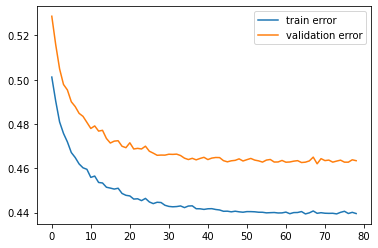

In [45]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

> d) ¿Para qué sirve el *early_stoping*?

Sirve para detener la regresión en caso de que no haya una mejora apreciable en un determinado número de iteraciones, con tal de no hacer la regresión muchas más veces de lo necesario y evitar el overfitting.

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

En este caso, ambas curvas dejar de bajar después de cierto punto. Ya que el training error es menor al validation error, y no hay un incremento en el validation error, puede decirse que los resultados del entrenamiento fueron satisfactorios, es decir, no se produce underfitting u overfitting.

> f) ¿Cuántas _epochs_ duró su entrenamiento?

Duró 79 epochs.

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [46]:
y_pred = reg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

#Visualización de algunos casos de prueba, junto con el valor de la predicción.
q = X_test.copy()
q["y_pred"] = y_pred
q.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,Sin_Season,Cos_Season,y_pred
2628,-0.323805,-1.241050,1.321502,0.900594,-0.800261,2.315959,-0.132317,-0.169657,1,1,0.30326,1.224647e-16,1.224647e-16,0.781831,0.623490,1.000000,6.123234e-17,1.000000e+00,6.123234e-17,597.810371
3080,-0.833292,-0.255113,-0.221584,0.747596,-0.746713,0.124438,-0.132317,-0.169657,1,1,0.30326,8.660254e-01,8.660254e-01,-0.781831,0.623490,0.866025,-5.000000e-01,1.000000e+00,6.123234e-17,343.526159
5813,1.288178,0.089965,-0.125141,0.925271,1.196288,-0.655790,-0.132317,-0.169657,1,1,0.30326,9.659258e-01,9.659258e-01,0.781831,0.623490,-0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,881.784371
1681,-1.476415,-0.698785,-0.607355,-0.009165,-1.473426,-0.655790,-0.132317,-0.169657,1,1,0.30326,2.588190e-01,2.588190e-01,-0.433884,-0.900969,0.866025,5.000000e-01,-1.000000e+00,-1.836970e-16,276.963153
6547,1.020906,0.780121,0.357074,-0.547124,1.226886,-0.655790,0.294554,-0.169657,1,1,0.30326,-9.659258e-01,-9.659258e-01,0.433884,-0.900969,-0.866025,-5.000000e-01,1.224647e-16,-1.000000e+00,1215.474564


> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [47]:
third_error = mean_squared_error(y_test, y_pred)
print("Error cuadrático: " + str(third_error))

Error cuadrático: 176101.9210849831


> i) ¿Mejoran los resultados con respecto al modelo anterior?

In [48]:
print("El error cuadrático para los datos en bruto fue: " + str(first_error))
print("El error cuadrático para los datos normalizados fue: " + str(second_error))
print("El error cuadrático para el modelo SGD fue: " + str(third_error))

El error cuadrático para los datos en bruto fue: 178321.36543638844
El error cuadrático para los datos normalizados fue: 176493.08636853515
El error cuadrático para el modelo SGD fue: 176101.9210849831


Los resultados una vez más mejoraron muy levemente, esta vez la mejora entre la regresión con datos normalizados y el modelo SGD es casi inapreciable.

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

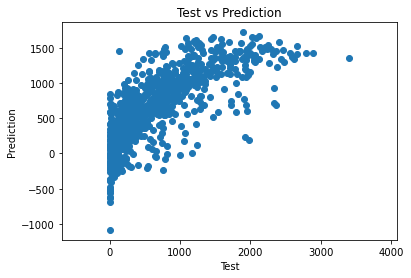

In [49]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

In [50]:
print("R2:", r2_score(y_test, y_pred) )

R2: 0.5369119822373123


## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

Un hiperparámetro es un parámetro utilizado para controlar el proceso de aprendizaje, los cuales deben ser dados al modelo de forma manual. El proceso de hyper tuning es el proceso en que se buscan los valores de hiperparámetros que otorguen los mejores resultados.

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

La penalización sirve para desincentivar modelos que se sobreajusten a los datos de prueba, reduciendo el riesgo de overfitting.

> c) ¿De qué se compone la penalización mediante regularización Ridge?

La penalización corresponde al la suma al cuadrado de los coeficientes Β del modelo, multiplicados por el coeficiente de regularización λ


> d) ¿Cómo funciona la regularización Lasso?

La regularización Ridge tiene una función de pérdida igual:

$$ SumaCuadradoResiduos + λ*Slope^2 $$

y la funcion Lasso: 

$$ SumaCuadradoResiduos + λ*|Slope| $$

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

Ventajas:

- Utiliza todas las características sin deshacerse de ninguna, lo que puede ser útil en modelos en que no hay demasiadas características sin utilidad.

Desventajas:

- Lasso puede ser utilizado en selección de características, ya que puede hacer que ciertos coeficientes se vuelvan cero. Al no poder deshacerse de ninguna característica, Ridge puede verse perjudicado en modelos con muchas características inútiles.

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.


> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [51]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [52]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [53]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [54]:
hypereg.fit(X_train, y_train)

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\faspe\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [55]:
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010638,0.003350,0.002170,0.000491,0.0001,0.1,constant,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.960420e+21,-6.128839e+23,-7.832156e+23,-1.444156e+23,-7.188500e+22,-3.234721e+23,3.136655e+23,52
1,0.009572,0.000917,0.001727,0.000535,0.0001,0.1,constant,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-3.798979e+23,-2.508031e+23,-6.997983e+22,-1.304483e+23,-7.278873e+23,-3.118033e+23,2.336031e+23,51
2,0.029669,0.009578,0.001401,0.000544,0.0001,0.1,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-6.285671e-01,-1.739661e+10,-5.829095e-01,-1.592948e+18,-4.300737e+22,-8.601792e+21,1.720279e+22,48
3,0.052632,0.013946,0.001332,0.000418,0.0001,0.1,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-5.451700e+16,-1.879024e+19,-5.417266e-01,-1.555927e+19,-7.198496e+12,-6.880807e+18,8.466871e+18,44
4,0.019929,0.005750,0.001534,0.000481,0.0001,0.1,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.977325e-01,-4.675864e-01,-4.670039e-01,-4.480654e-01,-4.430350e-01,-4.646847e-01,1.923989e-02,13
5,0.024553,0.007228,0.001510,0.000448,0.0001,0.1,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-5.138837e-01,-4.666442e-01,-4.577530e-01,-4.432767e-01,-4.387144e-01,-4.640544e-01,2.684475e-02,12
6,0.008363,0.002058,0.001628,0.000376,0.0001,0.01,constant,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-5.148734e-01,-4.667264e-01,-5.193214e-01,-7.816910e+00,-5.522474e-01,-1.974016e+00,2.921575e+00,30
7,0.014784,0.002398,0.001723,0.000608,0.0001,0.01,constant,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-5.342392e-01,-4.917092e-01,-4.903312e-01,-4.342209e-01,-4.817702e-01,-4.864542e-01,3.186317e-02,20
8,0.036722,0.006870,0.001411,0.000501,0.0001,0.01,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-7.320514e+00,-7.578446e-01,-5.302606e-01,-3.913166e+17,-3.482407e+00,-7.826333e+16,1.565267e+17,41
9,0.068559,0.023399,0.001477,0.000493,0.0001,0.01,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-2.243516e+16,-1.136641e+17,-5.258851e-01,-1.548033e+22,-4.600479e-01,-3.096093e+21,6.192117e+21,47


In [56]:
hypereg.best_params_

{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l1'}

Estos corresponden a los parámetros que otorgan los mejores resultados, y los que serán usados para hacer la predicción.

> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [57]:
y_pred = hypereg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

#Visualización de algunos casos de prueba, junto con el valor de la predicción.
q = X_test.copy()
q["y_pred"] = y_pred
q.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,Sin_Season,Cos_Season,y_pred
2628,-0.323805,-1.241050,1.321502,0.900594,-0.800261,2.315959,-0.132317,-0.169657,1,1,0.30326,1.224647e-16,1.224647e-16,0.781831,0.623490,1.000000,6.123234e-17,1.000000e+00,6.123234e-17,545.007469
3080,-0.833292,-0.255113,-0.221584,0.747596,-0.746713,0.124438,-0.132317,-0.169657,1,1,0.30326,8.660254e-01,8.660254e-01,-0.781831,0.623490,0.866025,-5.000000e-01,1.000000e+00,6.123234e-17,354.432487
5813,1.288178,0.089965,-0.125141,0.925271,1.196288,-0.655790,-0.132317,-0.169657,1,1,0.30326,9.659258e-01,9.659258e-01,0.781831,0.623490,-0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,946.528345
1681,-1.476415,-0.698785,-0.607355,-0.009165,-1.473426,-0.655790,-0.132317,-0.169657,1,1,0.30326,2.588190e-01,2.588190e-01,-0.433884,-0.900969,0.866025,5.000000e-01,-1.000000e+00,-1.836970e-16,252.263330
6547,1.020906,0.780121,0.357074,-0.547124,1.226886,-0.655790,0.294554,-0.169657,1,1,0.30326,-9.659258e-01,-9.659258e-01,0.433884,-0.900969,-0.866025,-5.000000e-01,1.224647e-16,-1.000000e+00,1244.714835


> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [58]:
fourth_error = mean_squared_error(y_test, y_pred)
print("Error cuadrático: " + str(fourth_error))

Error cuadrático: 176545.4557017034


> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

In [59]:
print("El error cuadrático para los datos en bruto fue: " + str(first_error))
print("El error cuadrático para los datos normalizados fue: " + str(second_error))
print("El error cuadrático para el modelo SGD fue: " + str(third_error))
print("El error cuadrático utilizando hiperparámetros fue: " + str(fourth_error))

El error cuadrático para los datos en bruto fue: 178321.36543638844
El error cuadrático para los datos normalizados fue: 176493.08636853515
El error cuadrático para el modelo SGD fue: 176101.9210849831
El error cuadrático utilizando hiperparámetros fue: 176545.4557017034


Los resultados son levemente mejores a los resultados obtenidos para los modelos en bruto, sin embargo son levemente peores que los resultados para los otros dos modelos.

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

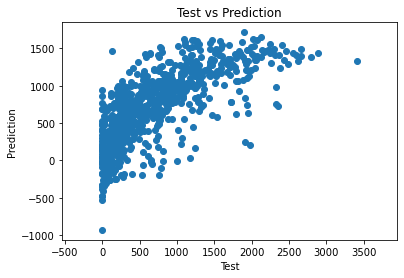

In [60]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

En base a los resultados obtenidos al realizar las cuatro predicciones, se observó que la mayoría de los modelos tuvieron resultados similares, con el SDGRegressor obteniendo los mejores resultados. En general, se puede concluir que la elección adecuada de los parámetros y la ejecución correcta del modelo son importantes para obtener resultados precisos y confiables en el proceso de predicción. 

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [61]:
#!kaggle datasets download -d uciml/mushroom-classification

In [62]:
#!unzip mushroom-classification.zip

In [63]:
df = pd.read_csv('mushrooms.csv')

In [64]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


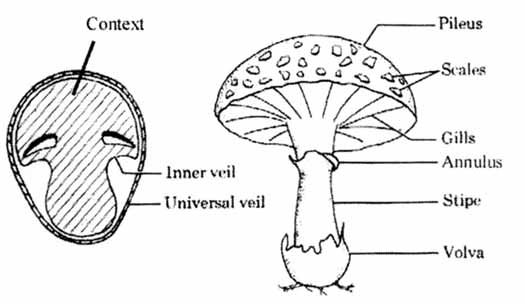

### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

Porque solo tiene un valor unico por lo cual no tiene ninguan variabilidad. Como todos los valores en la variable son iguales, no hay ninguna información que se pueda extraer de ella para distinguir entre diferentes clases de hongos.

<AxesSubplot:xlabel='veil-type', ylabel='count'>

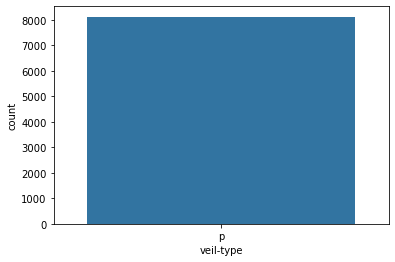

In [66]:
sns.countplot(x="veil-type", data=df)

In [67]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

C:\Users\faspe\miniconda3\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


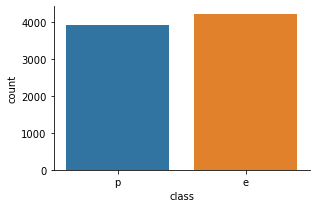

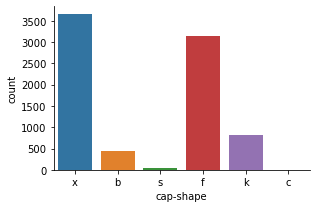

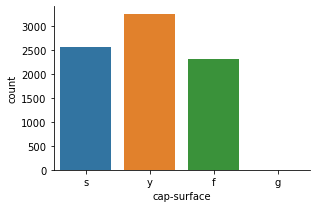

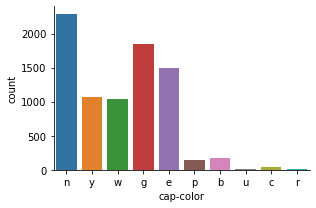

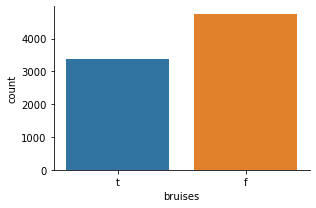

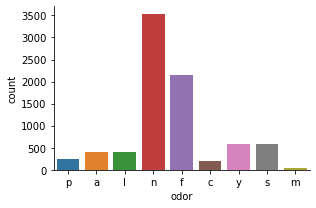

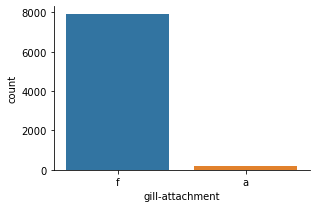

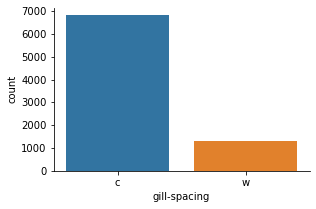

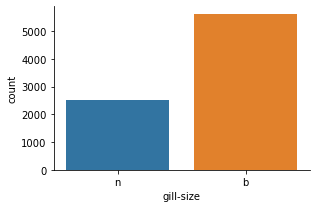

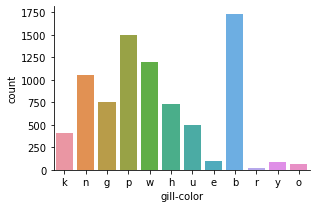

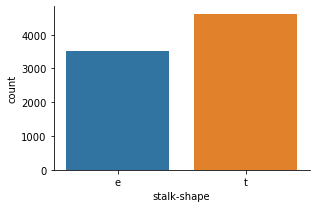

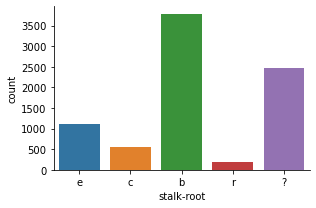

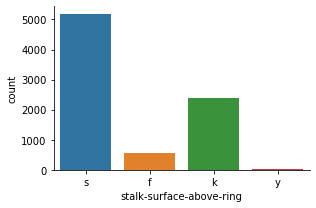

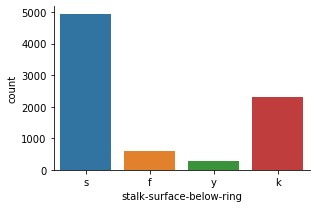

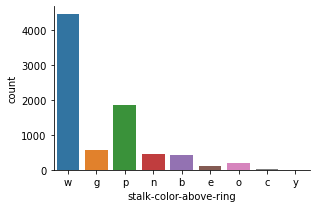

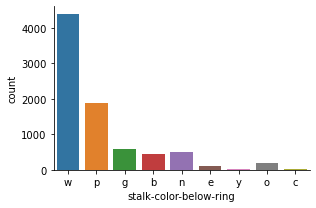

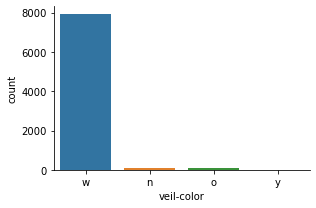

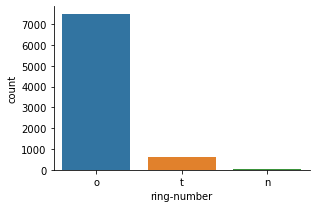

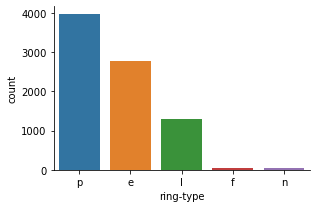

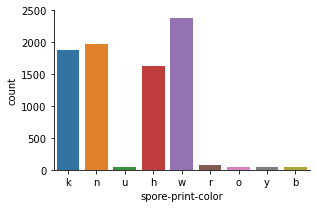

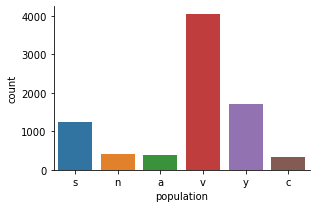

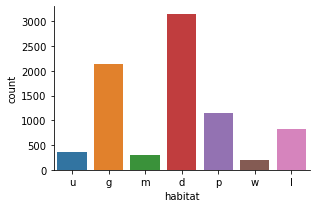

In [68]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

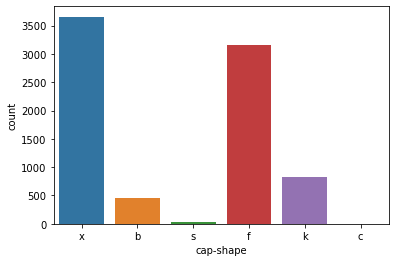

In [69]:
sns.countplot(x="cap-shape", data=df)
plt.show()

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

In [70]:
X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

In [71]:
from sklearn.calibration import LabelEncoder

#Fuente: https://www.kaggle.com/code/nitinchan/mushroom-classification-rf-features-encodings
sample_1 = X.copy()
label = LabelEncoder()
for col in sample_1.columns:
    sample_1[col] = label.fit_transform(sample_1[col])
# Print Updated Data
sample_1.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,2,7,7,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,2,7,7,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,2,7,7,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,2,7,7,2,1,4,2,3,3


> e) Separe los subconjuntos en _X_ e _y_

In [72]:
# load data and split into train/test sets
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


Train set shape: (5687, 112)
Test set shape: (2437, 112)


In [73]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [74]:
#pca = PCA(n_components=#n_features - {1,10,50}
#pca.fit(X_train)

#X_train_pca = pca.transform(X_train)
#X_test_pca = pca.transform(X_test)

k= [1,10,50]
x_train_pca = []
x_test_pca = []

n_features = X_train.shape[1]
for i in k:
    n = n_features - i #n_features - k
  # get the indices of the features sorted by mutual information score
    pca = PCA(n_components= n )
    pca.fit(X_train)
    x_train_pca.append( pca.transform(X_train) )
    x_test_pca.append( pca.transform(X_test) )

Hecho

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [75]:
mi = mutual_info_classif(X_train, y_train)

In [76]:
# set k to the number of features you want to exclude
k = 1, 10, 50

for i in k:
  # compute the number of features to select
  n = len(mi) - i

  # get the indices of the features sorted by mutual information score
  sorted_indices = np.argsort(mi)

  # select the top n features
  selected_indices = sorted_indices[-n:]

In [77]:
# set k to the number of features you want to exclude
k = [1, 10, 50]
x_train_mi = []
x_test_mi = []

for i in k:
    # compute the number of features to select
    n = len(mi) - i
    ind = np.argpartition(mi, -n)[-n:]
    # get the indices of the features sorted by mutual information score
    x_train_mi.append(X_train[X_train.columns[ind]].copy())
    x_test_mi.append( X_test[X_test.columns[ind]].copy() )
    # select the top n features
x_train_mi[2].head()

,cap-color_c,habitat_g,population_s,veil-color_w,cap-shape_k,habitat_l,stalk-color-above-ring_o,gill-attachment,stalk-surface-below-ring_y,stalk-root_r,...,odor_n,population_v,odor_l,odor_f,odor_a,cap-shape_b,gill-size,habitat_p,gill-spacing,bruises
1971,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6654,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
5606,0,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
3332,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
6988,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene e clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

In [79]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cr = classification_report(y_test, y_pred, 
                            labels=[0,1], target_names=['edible', 'poisonous'],
                            digits = 5)
print(cr)

              precision    recall  f1-score   support

      edible    0.99764   0.97314   0.98524      1303
   poisonous    0.96998   0.99735   0.98348      1134

    accuracy                        0.98441      2437
   macro avg    0.98381   0.98525   0.98436      2437
weighted avg    0.98477   0.98441   0.98442      2437



> c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [80]:
clf = {}
y_pred = {}

#Se define y entrena un clasificador para cada conjunto en x_train_mi
for i in range(len(k)):
    clf[i] = GaussianNB()
    clf[i].fit(x_train_mi[i], y_train)
    y_pred[i] = clf[i].predict(x_test_mi[i])

> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [81]:
#Para cada y_pred obtenido, se hace el clasification report
cr = {}
for i in range(len(k)):
    cr[i] = classification_report(y_test, y_pred[i], 
                                  labels=[0,1], target_names=['edible', 'poisonous'],
                                  digits = 5)
    print("Para k = " + str(k[i]) + "\n" + cr[i])

Para k = 1
              precision    recall  f1-score   support

      edible    0.99917   0.92249   0.95930      1303
   poisonous    0.91815   0.99912   0.95693      1134

    accuracy                        0.95815      2437
   macro avg    0.95866   0.96080   0.95811      2437
weighted avg    0.96147   0.95815   0.95819      2437

Para k = 10
              precision    recall  f1-score   support

      edible    0.99836   0.93400   0.96511      1303
   poisonous    0.92939   0.99824   0.96259      1134

    accuracy                        0.96389      2437
   macro avg    0.96388   0.96612   0.96385      2437
weighted avg    0.96627   0.96389   0.96393      2437

Para k = 50
              precision    recall  f1-score   support

      edible    0.93106   0.98465   0.95711      1303
   poisonous    0.98111   0.91623   0.94756      1134

    accuracy                        0.95281      2437
   macro avg    0.95609   0.95044   0.95233      2437
weighted avg    0.95435   0.95281   0.9

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

Tomando como métrica el f1-score (ya que depende de tanto el precision como el recall), se concluye que $k = 10$ es la mejor representación.

> f) Muestre los errores tipo 1 y tipo 2.

<AxesSubplot:>

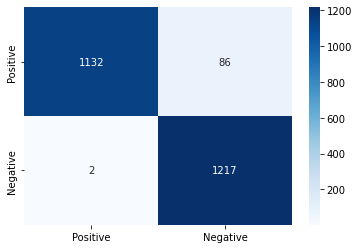

In [82]:
#Mejor representación
x_train_final = x_train_mi[1]
x_test_final = x_test_mi[1]
y_pred_final = y_pred[1]

# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_final)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fp], [fn, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])

### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

El modelo asume que las clases están normalizadas.

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

El modelo asume que las matrices de covarianza son iguales para todas las clases.

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

In [83]:
clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(x_train_final, y_train)

y_pred = clf.predict(x_test_final)

#Visualización de algunos casos de prueba, junto con el valor de la predicción.
q = x_test_final.copy()
q["y_pred"] = y_pred
q.head()

,stalk-surface-above-ring_y,veil-color_o,cap-color_n,cap-shape_c,cap-shape_f,stalk-color-below-ring_c,habitat_m,habitat_u,cap-color_g,stalk-root_b,...,population_v,odor_l,odor_f,odor_a,cap-shape_b,gill-size,habitat_p,gill-spacing,bruises,y_pred
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [84]:
cf = classification_report(y_test, y_pred, 
                        labels=[0,1], target_names=['edible', 'poisonous'],
                        digits = 5)

print(cf)

              precision    recall  f1-score   support

      edible    0.99847   1.00000   0.99923      1303
   poisonous    1.00000   0.99824   0.99912      1134

    accuracy                        0.99918      2437
   macro avg    0.99923   0.99912   0.99918      2437
weighted avg    0.99918   0.99918   0.99918      2437



> e) Muestre los errores tipo 1 y tipo 2.

<AxesSubplot:>

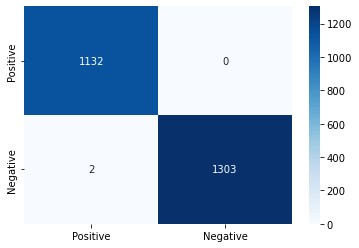

In [85]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fp], [fn, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])

### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [86]:
clf = LogisticRegression()
clf.fit(x_train_final, y_train)

y_pred = clf.predict(x_test_final)

#Visualización de algunos casos de prueba, junto con el valor de la predicción.
q = x_test_final.copy()
q["y_pred"] = y_pred
q.head()

,stalk-surface-above-ring_y,veil-color_o,cap-color_n,cap-shape_c,cap-shape_f,stalk-color-below-ring_c,habitat_m,habitat_u,cap-color_g,stalk-root_b,...,population_v,odor_l,odor_f,odor_a,cap-shape_b,gill-size,habitat_p,gill-spacing,bruises,y_pred
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [87]:
cf = classification_report(y_test, y_pred, 
                        labels=[0,1], target_names=['edible', 'poisonous'],
                        digits = 5)

print(cf)

              precision    recall  f1-score   support

      edible    0.97953   0.99156   0.98551      1303
   poisonous    0.99016   0.97619   0.98313      1134

    accuracy                        0.98441      2437
   macro avg    0.98485   0.98387   0.98432      2437
weighted avg    0.98448   0.98441   0.98440      2437



> f) Muestre los errores tipo 1 y tipo 2.

<AxesSubplot:>

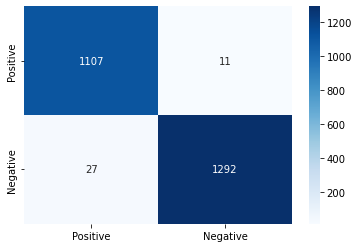

In [88]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fp], [fn, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])

### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [89]:
kernel_list = ["linear", "poly", "rbf"]
gamma_list = [0.005, 0.0001]
clf = {}
y_pred_list = []

i = 0
for kernel in kernel_list:
    for gamma in gamma_list:
        clf[i] = NuSVC(kernel=kernel, gamma=gamma)
        
        clf[i].fit(x_train_final, y_train)
        y_pred_list.append(clf[i].predict(x_test_final))
        i += 1

#Visualización de algunos casos de prueba, junto con el valor de la predicción.
q = x_test_final.copy()
for j in range(6):
    s = "y_pred_" + str(j)
    q[s] = y_pred[j]
q.head()

,stalk-surface-above-ring_y,veil-color_o,cap-color_n,cap-shape_c,cap-shape_f,stalk-color-below-ring_c,habitat_m,habitat_u,cap-color_g,stalk-root_b,...,gill-size,habitat_p,gill-spacing,bruises,y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [90]:
j = 0
for kernel in kernel_list:
    for gamma in gamma_list:
        cf = classification_report(y_test, y_pred_list[j], 
                        labels=[0,1], target_names=['edible', 'poisonous'],
                        digits = 5)
        j += 1
        print("for kernel " + kernel + " and gamma = " + str(gamma) + ":\n" + cf)

for kernel linear and gamma = 0.005:
              precision    recall  f1-score   support

      edible    0.85724   1.00000   0.92313      1303
   poisonous    1.00000   0.80864   0.89420      1134

    accuracy                        0.91096      2437
   macro avg    0.92862   0.90432   0.90866      2437
weighted avg    0.92367   0.91096   0.90967      2437

for kernel linear and gamma = 0.0001:
              precision    recall  f1-score   support

      edible    0.85724   1.00000   0.92313      1303
   poisonous    1.00000   0.80864   0.89420      1134

    accuracy                        0.91096      2437
   macro avg    0.92862   0.90432   0.90866      2437
weighted avg    0.92367   0.91096   0.90967      2437

for kernel poly and gamma = 0.005:
              precision    recall  f1-score   support

      edible    0.87216   1.00000   0.93171      1303
   poisonous    1.00000   0.83157   0.90804      1134

    accuracy                        0.92162      2437
   macro avg    0.


> e) Muestre los errores tipo 1 y tipo 2.

for kernel linear and gamma = 0.005:

for kernel linear and gamma = 0.0001:

for kernel poly and gamma = 0.005:

for kernel poly and gamma = 0.0001:

for kernel rbf and gamma = 0.005:

for kernel rbf and gamma = 0.0001:



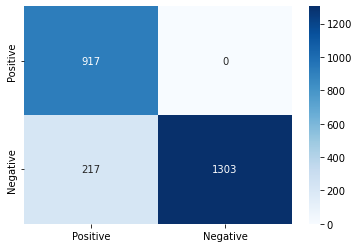

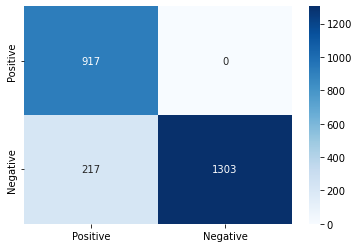

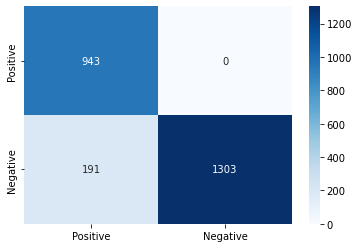

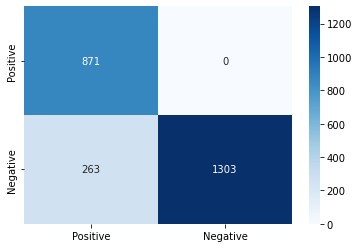

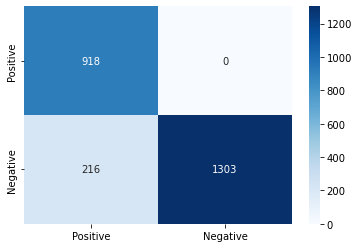

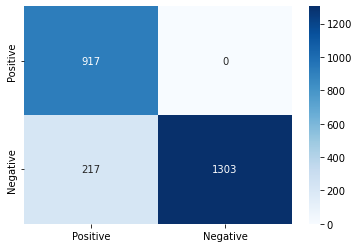

In [91]:
j = 0
for kernel in kernel_list:
    for gamma in gamma_list:
        cm = confusion_matrix(y_test, y_pred_list[j])
        j += 1
        
        # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
        tn, fp, fn, tp = cm.ravel()
        
        # create a 2x2 matrix of the type 1 and type 2 errors        
        error_matrix = [[tp, fp], [fn, tn]]
        
        # plot the heatmap using seaborn        
        print("for kernel " + kernel + " and gamma = " + str(gamma) + ":\n")
        plt.figure()
        sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])

## 2.3 Conclusiones:

Incluso sin la utilización de técnicas se lograron obtener buenos resultados. De las técnicas utilizadas, los f1-score obtenidos (para "edible" y "poisonous" respectivamente) fueron:

- **Naive Bayes con datos brutos:** 0.98524 / 0.98348
- **Naive Bayes con k = 10:** 0.96511 / 0.96259
- **Linear Discriminant Analysis:** 0.99923 / 0.99912
- **Logistic Regression:** 0.98551 / 0.98313
- **SVM (poly con gamma=0.005)** 0.93171 / 0.90804

Por esta métrica, LDA obtuvo el f1-score más alto, mientras que Naive Bayes (con datos mi) y SVM obtuvieron resultados menores a los datos brutos.